In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period.ipynb
2022_Feb_week4_Linear_fit_period_Sine_fit.py
2022_Feb_week4_Linear_fit_period_weighted_data.ipynb
2022_Feb_week4_Mean_calculation_T0_combined.txt
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt
interporate.out


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2450000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

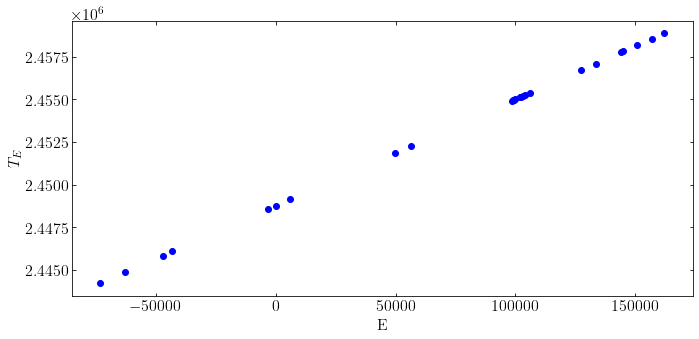

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

25


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)

m = params[0]
c = params[1]

dm = covariance[0,0]
dc = covariance[1,1]


print('Slope (m) is ', m)
print('The error of the slope (dm) is ', dm)
print('Intercept (c) is ', c)
print('The error of the intercept (dc) is ', dc)
print(covariance)

Slope (m) is  0.062362796434744044
The error of the slope (dm) is  2.965424167075335e-15
Intercept (c) is  2448773.2198654446
The error of the intercept (dc) is  3.09950927939782e-05
[[ 2.96542417e-15 -2.15461798e-10]
 [-2.15461798e-10  3.09950928e-05]]


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
# calculate the output for the range
y_line = linear_fit(x_line, m, c)

range_x_line = len(x_line)

Res_linear = y - y_line
print(Res_linear)

#np.savetxt('plot_curve_fit_Linear.txt', np.c_[x, Res_linear,dy])

print(range_x_line)

[-8.55886145e-03  3.78489872e+01  4.14362193e+02  3.86815294e+01
  1.90103138e+03  1.50294643e+03  1.26176632e+03  3.37758936e+03
  3.18021914e+03  5.20403370e+03  4.61433014e+03  4.03246372e+03
  3.44985751e+03  2.97527417e+03  2.38800806e+03  1.82543766e+03
  1.25120540e+03  7.84001655e+02  1.49510258e+03  1.27260036e+03
  1.30893513e+03  7.60711659e+02  5.08462265e+02  2.88142631e+02
  3.40740476e-03]
25


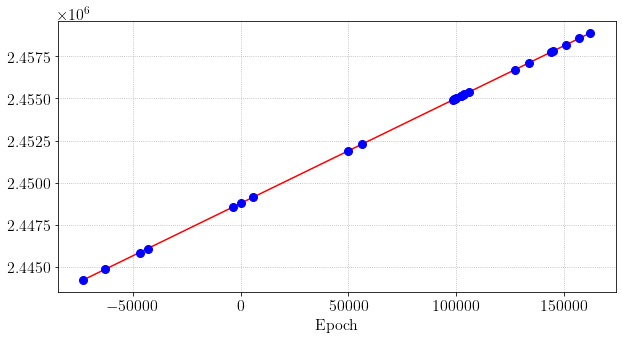

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
ax0.set_ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()